In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [4]:
tonedata = pd.read_csv("data/tonedata.csv", sep=" ")
tonedata

,stretchratio,tuned
0,1.35,1.461
1,1.40,1.407
2,1.45,1.452
3,1.50,1.300
4,1.55,1.351
...,...,...
145,2.75,2.066
146,2.80,2.426
147,2.85,2.117
148,2.90,2.097


In [5]:
X_stretchratio = tonedata["stretchratio"].values
X_tuned = tonedata["tuned"].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


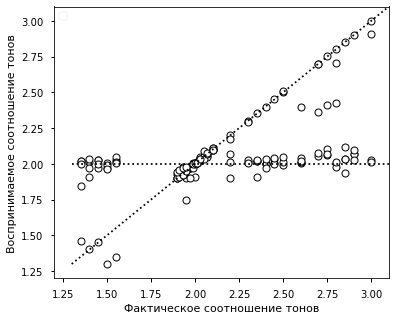

In [10]:
plt.figure(figsize=(6,5))
# plt.figure(figsize=(15,12))
plt.scatter(X_stretchratio, X_tuned, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot([1.3, 3.2], [2.0, 2.0], linestyle=':', color='k')
plt.plot([1.3, 3.2], [1.3, 3.2], linestyle=':', color='k')
plt.xlabel('Фактическое соотношение тонов')
plt.ylabel('Воспринимаемое соотношение тонов')
plt.ylim(1.2, 3.1)
plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_scatter.eps')
plt.show()

In [11]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.func as ml_func
import mlgrad.weights as ml_weights
import mlgrad.af as ml_af

In [41]:
layer = ml_model.GeneralModelLayer(1)
tone_linmod1 = ml_model.LinearModel(1)
tone_linmod2 = ml_model.LinearModel(1)
layer.append(tone_linmod1)
layer.append(tone_linmod2)
nn = ml_model.FFNetworkModel()
nn.add(layer)
# for mod in layer.models:
#     print(mod.n_param)
# print(layer.n_param)
# print(nn.n_param)

nn.allocate()
# print(np.array(nn.param))
# for mod in layer:
#     print(np.array(mod.param))

# print('*')
nn.init_param()

# print(np.array(nn.param))
# for mod in layer:
#     print(np.array(mod.param))


In [42]:
layer = nn.layers[0]
layer.param.base

array([0.50014406, 0.93543678, 0.19996567, 0.66583027])

In [43]:
# minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs(0.001)), 2, a=15)
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.Square()), 2, a=16)
tone_risk = ml_risk.ER21(X_stretchratio.reshape(-1,1), X_tuned, nn, minloss)

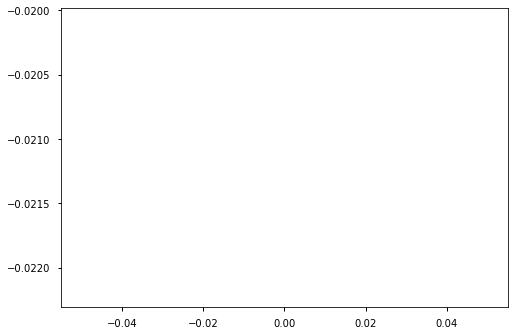

In [46]:
tone_alg = mlgrad.erm_fg(tone_risk, n_restart=5, h=0.001)

plt.plot(tone_alg.lvals)
plt.show()

In [47]:
print(np.array(tone_linmod1.param))
print(np.array(tone_linmod2.param))
tone_alg.K

[0.59487401 0.71209998]
[1.80070858 0.10064646]


0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


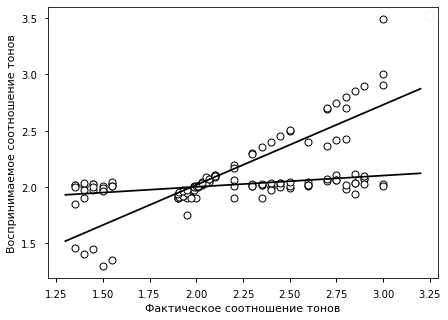

In [48]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X_stretchratio, X_tuned, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot([1.3, 3.2], tone_linmod1.evaluate_all(np.array([[1.3], [3.2]])), color='k')
plt.plot([1.3, 3.2], tone_linmod2.evaluate_all(np.array([[1.3], [3.2]])), color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('Фактическое соотношение тонов')
plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_scatter.eps')
plt.show()

In [56]:
layer_rob = ml_model.GeneralModelLayer(1)
tone_rob_linmod1 = ml_model.LinearModel(1)
tone_rob_linmod2 = ml_model.LinearModel(1)
layer_rob.append(tone_rob_linmod1)
layer_rob.append(tone_rob_linmod2)
nn_rob = ml_model.FFNetworkModel()
nn_rob.add(layer_rob)

nn_rob.allocate()
nn_rob.init_param()

In [57]:
tone_risk = ml_risk.ER21(X_stretchratio.reshape(-1,1), X_tuned, nn_rob, minloss)
agg_func = ml_af.averaging_function("WM", alpha=0.90)
weights_tone = ml_weights.MWeights(agg_func, tone_risk)

0.06530966793711851
-0.029549352343741113


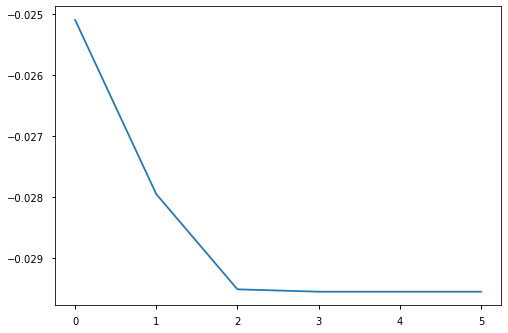

In [58]:
fg_tone = mlgrad.fg(tone_risk, h=0.001, tol=1.0e-9)
tone_rob_alg = mlgrad.erm_irgd(fg_tone, weights_tone, tol=1.0e-7)

plt.plot(tone_rob_alg.lvals)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


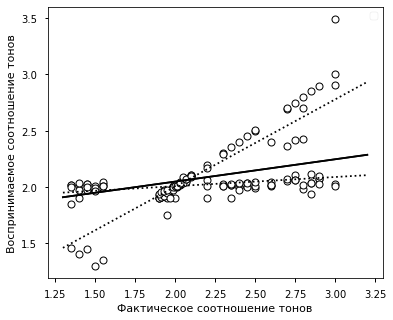

In [59]:
plt.figure(figsize=(6,5))
# plt.figure(figsize=(15,12))
plt.scatter(X_stretchratio, X_tuned, s=49, c='w', edgecolors='k', linewidth=1.0)
# plt.title("Соотношения тонов")
plt.plot([1.3, 3.2], tone_rob_linmod1.evaluate_all(np.array([[1.3], [3.2]])), color='k')
plt.plot([1.3, 3.2], tone_rob_linmod2.evaluate_all(np.array([[1.3], [3.2]])), color='k')
plt.plot([1.3, 3.2], tone_linmod1.evaluate_all(np.array([[1.3], [3.2]])), linestyle=':', color='k')
plt.plot([1.3, 3.2], tone_linmod2.evaluate_all(np.array([[1.3], [3.2]])), linestyle=':', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('Фактическое соотношение тонов')
plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_rob_scatter.eps')
plt.show()